In [15]:
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [19]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description LIKE('%REQUIREMENT%')
        """
doc_ids, corpus = get_query_corpus(query, True)
corpus = np.array([extract_requirements(doc) for doc in corpus])

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8839 documents loaded!


In [21]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
# tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max()

Loading ../output/CountVectorizer.pkl from cache...
 -> ../output/CountVectorizer.pkl loaded!
Loading ../output/TfidfTransformer.pkl from cache...
 -> ../output/TfidfTransformer.pkl loaded!
Loading ../output/NMF.pkl from cache...                                         
 -> ../output/NMF.pkl loaded!


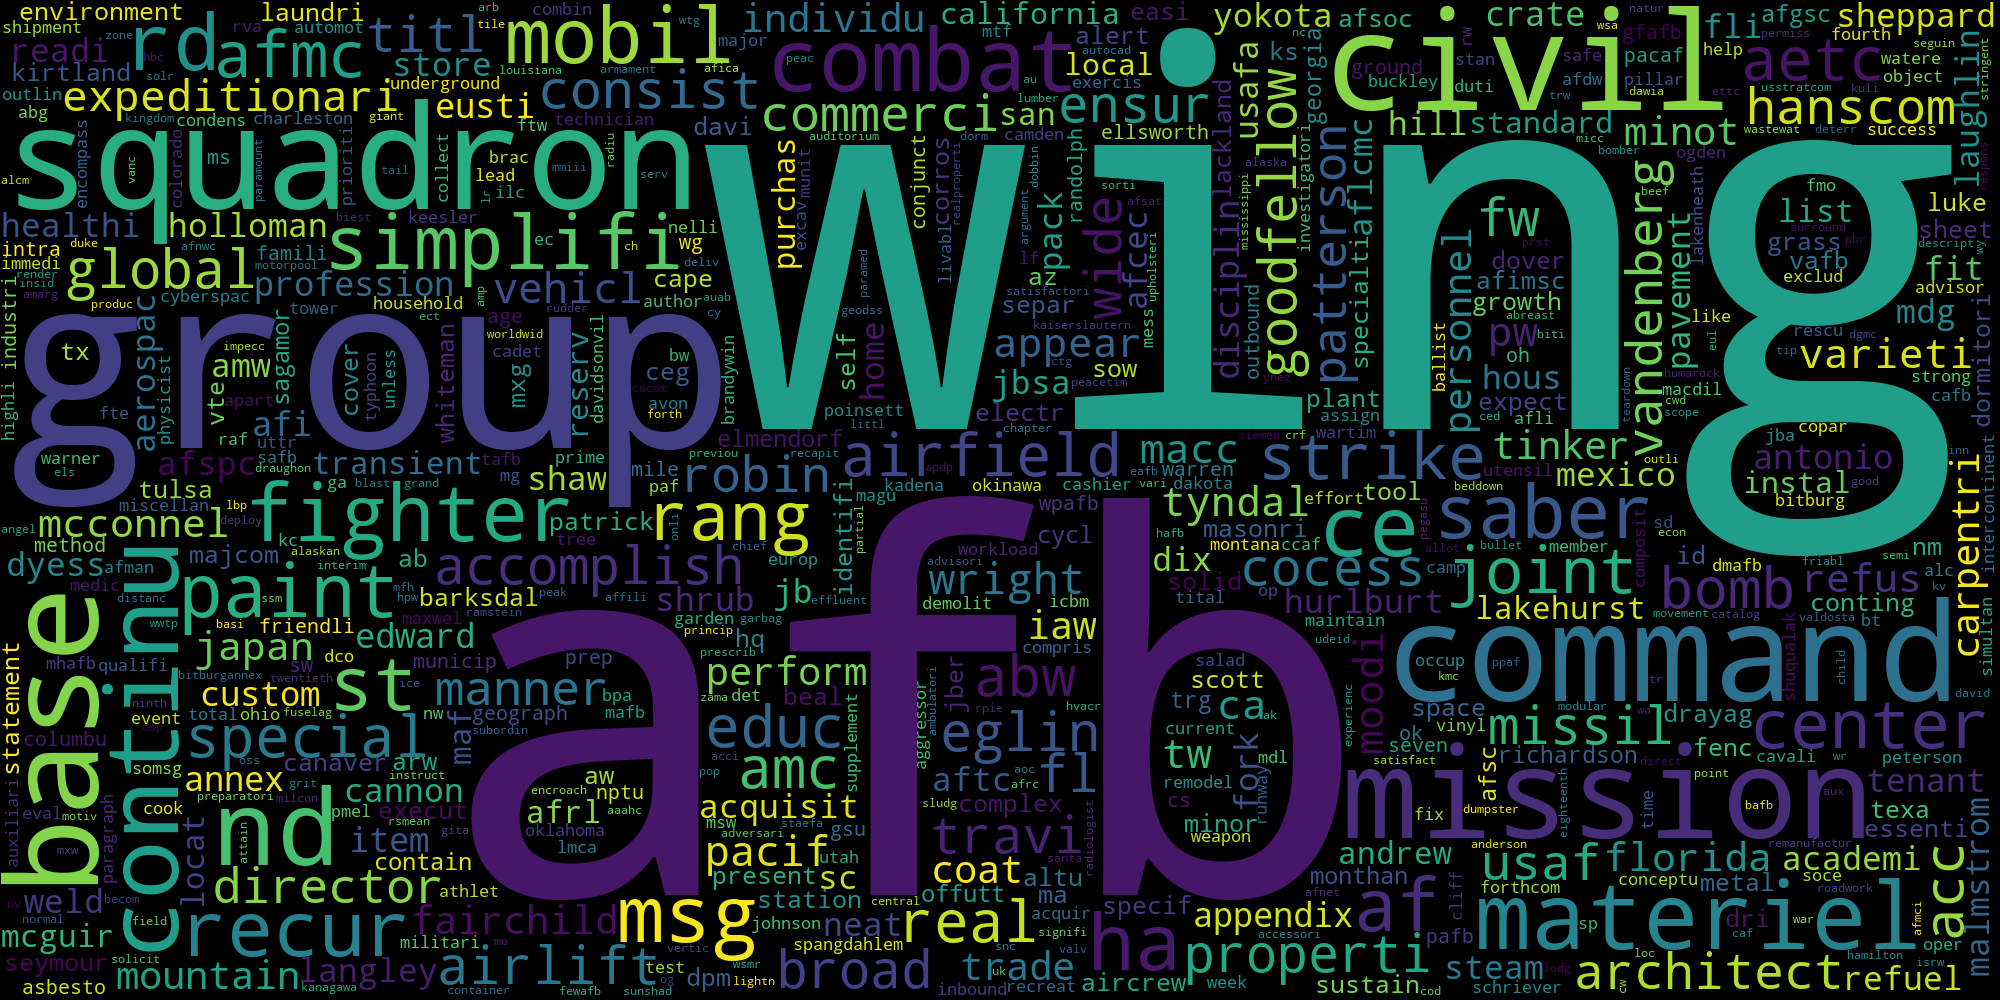

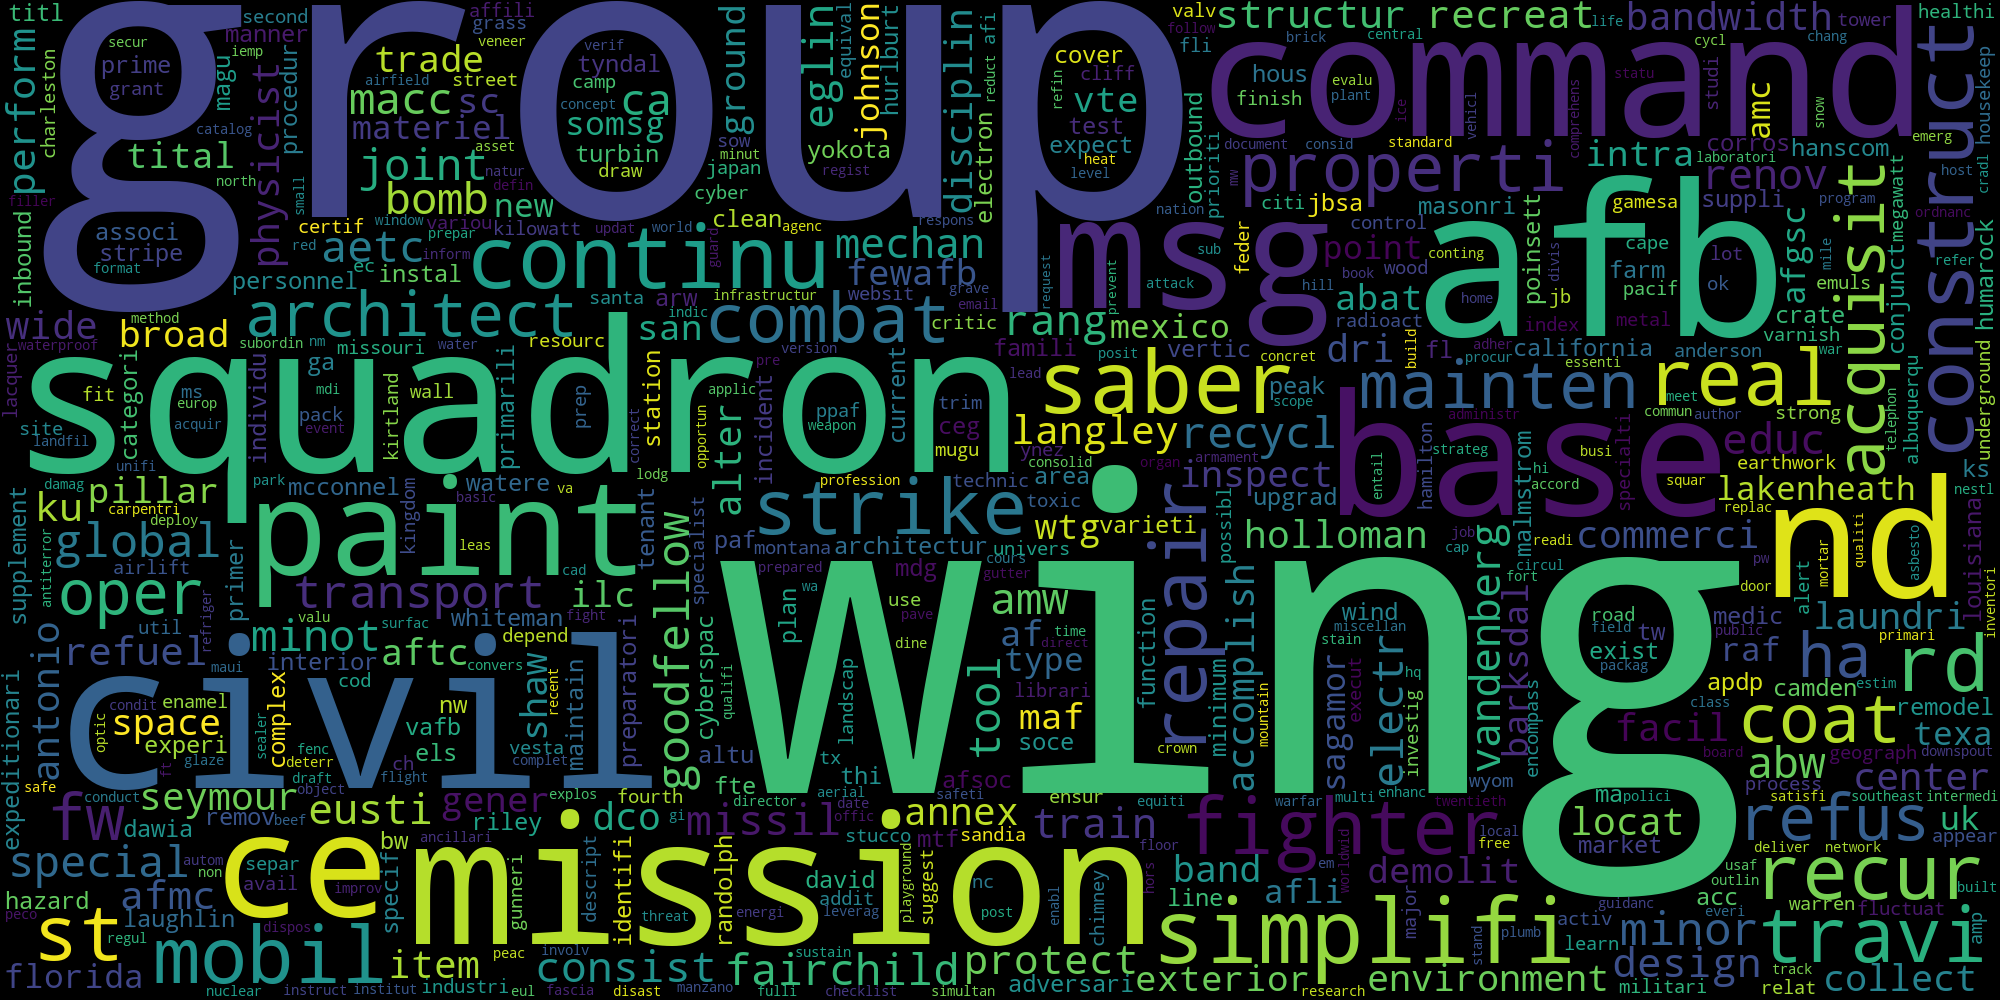

STRENGTH: 0.06901302812887565
e Department of the Air Force, Air Force Global Strike Command, 20th Air Force, 91st Missile Wing, 5th Mission Support Group, 5th Civil Engineer Squadron, has a continuing requirement for a Simplified Acquisition of Base Engineering Requirements (SABER) contract.  Simplified Acquisition of Base Engineering Requirements (SABER) construction services at Minot AFB, ND 
*************************************************************

STRENGTH: 0.0620576410393365
e Department of the Air Force, Air Combat Command, 12th Air Force, 366th Fighter Wing, 366th Mission Support Group, 366th Civil Engineering Squadron, may have a continuing requirement for custodial services at Mountain Home AFB, ID.  The contractor shall provide non-personal services, to include all personnel, supervision and services necessary to perform Custodial Services up to seven days per week 
*************************************************************

STRENGTH: 0.059760834155954366
e Departmen

In [28]:
topic_i = 4

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))
# wc = WordCloud(background_color="black", max_words=666, width=2000, height=1000)
# wc.fit_words({vocabulary[word_i]: H[topic_i, word_i] for word_i in range(H.shape[1]) if H[topic_i, word_i]})
# plt.imshow(f"../output/wordclouds/{topic_i}_nmf_wordcloud.png", interpolation='bilinear')
# plt.axis("off")
# plt.show()

# plt.imshow(f"../output/wordclouds/{topic_i}_tfidf_wordcloud.png", interpolation='bilinear')
# plt.axis("off")
# plt.show()

for doc, strength in get_top_10_docs(W, topic_i):
    print("STRENGTH:", strength)
    print(corpus[doc][3:])
    print("*************************************************************\n")

In [ ]:
wc.to_image().show()